# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [ ]:
pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import requests
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    # Add 1 to the record count
    record_count += 1
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"]
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | port mathurin
Processing Record 3 of Set 1 | olonkinbyen
Processing Record 4 of Set 1 | port alfred
Processing Record 5 of Set 1 | vadso
Processing Record 6 of Set 1 | uturoa
Processing Record 7 of Set 1 | harstad
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | invercargill
Processing Record 10 of Set 1 | porto novo
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | cabo san lucas
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | belmonte
Processing Record 15 of Set 1 | anadyr
Processing Record 16 of Set 1 | coacotla
Processing Record 17 of Set 1 | ilulissat
Processing Record 18 of Set 1 | chonchi
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | malango
Processing Record 21 of Set 1 | severo-yeniseyskiy
Processing Record 22 of Set 1 | m

Processing Record 38 of Set 4 | san andres
Processing Record 39 of Set 4 | kerikeri
Processing Record 40 of Set 4 | ugoofaaru
Processing Record 41 of Set 4 | pacora
Processing Record 42 of Set 4 | dubbo
Processing Record 43 of Set 4 | papatowai
Processing Record 44 of Set 4 | baracoa
Processing Record 45 of Set 4 | paradip garh
Processing Record 46 of Set 4 | whitehorse
Processing Record 47 of Set 4 | kurmuk
Processing Record 48 of Set 4 | villa gesell
Processing Record 49 of Set 4 | dudinka
Processing Record 0 of Set 5 | puerto baquerizo moreno
Processing Record 1 of Set 5 | kaka
Processing Record 2 of Set 5 | grande prairie
Processing Record 3 of Set 5 | weno
Processing Record 4 of Set 5 | saint joseph
Processing Record 5 of Set 5 | motueka
Processing Record 6 of Set 5 | hede
Processing Record 7 of Set 5 | sainte-anne-des-monts
Processing Record 8 of Set 5 | xining
Processing Record 9 of Set 5 | vishnyeva
Processing Record 10 of Set 5 | shimoda
Processing Record 11 of Set 5 | maceio


Processing Record 31 of Set 8 | nazca
Processing Record 32 of Set 8 | saguenay
Processing Record 33 of Set 8 | turaif
Processing Record 34 of Set 8 | jinchang
Processing Record 35 of Set 8 | mendefera
Processing Record 36 of Set 8 | floro
Processing Record 37 of Set 8 | itaituba
Processing Record 38 of Set 8 | wurtulla
Processing Record 39 of Set 8 | dunhua
Processing Record 40 of Set 8 | bamboo flat
Processing Record 41 of Set 8 | zakamensk
Processing Record 42 of Set 8 | novo cruzeiro
Processing Record 43 of Set 8 | stiens
Processing Record 44 of Set 8 | sao francisco de paula
Processing Record 45 of Set 8 | ulaangom
Processing Record 46 of Set 8 | hammerfest
Processing Record 47 of Set 8 | borogontsy
Processing Record 48 of Set 8 | skeldon
Processing Record 49 of Set 8 | kota belud
Processing Record 0 of Set 9 | queenstown
Processing Record 1 of Set 9 | gazi
Processing Record 2 of Set 9 | kamalpur
Processing Record 3 of Set 9 | naco
Processing Record 4 of Set 9 | diego de almagro
Pr

Processing Record 22 of Set 12 | calama
Processing Record 23 of Set 12 | nanyuki
Processing Record 24 of Set 12 | bolgar
Processing Record 25 of Set 12 | vuktyl
Processing Record 26 of Set 12 | joshua tree
Processing Record 27 of Set 12 | statesboro
Processing Record 28 of Set 12 | boundiali
Processing Record 29 of Set 12 | bonthe
Processing Record 30 of Set 12 | trinidad
Processing Record 31 of Set 12 | mont-laurier
Processing Record 32 of Set 12 | pacasmayo
Processing Record 33 of Set 12 | pechora
Processing Record 34 of Set 12 | naters
Processing Record 35 of Set 12 | rokytne
Processing Record 36 of Set 12 | sukumo
Processing Record 37 of Set 12 | nuuk
Processing Record 38 of Set 12 | hayma'
City not found. Skipping...
Processing Record 39 of Set 12 | chernomorskoye
Processing Record 40 of Set 12 | armacao de buzios
Processing Record 41 of Set 12 | at taj
Processing Record 42 of Set 12 | remire-montjoly
Processing Record 43 of Set 12 | knyaze-volkonskoye
Processing Record 44 of Set 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,11.11,64,100,11.89,SH,1698604959
1,port mathurin,-19.6833,63.4167,24.57,79,12,6.72,MU,1698604959
2,olonkinbyen,70.9221,-8.7187,0.22,72,100,1.10,SJ,1698604959
3,port alfred,-33.5906,26.8910,14.54,75,99,1.34,ZA,1698604960
4,vadso,70.0744,29.7487,-3.91,80,75,4.12,NO,1698604960


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,11.11,64,100,11.89,SH,1698604959
1,port mathurin,-19.6833,63.4167,24.57,79,12,6.72,MU,1698604959
2,olonkinbyen,70.9221,-8.7187,0.22,72,100,1.10,SJ,1698604959
3,port alfred,-33.5906,26.8910,14.54,75,99,1.34,ZA,1698604960
4,vadso,70.0744,29.7487,-3.91,80,75,4.12,NO,1698604960


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

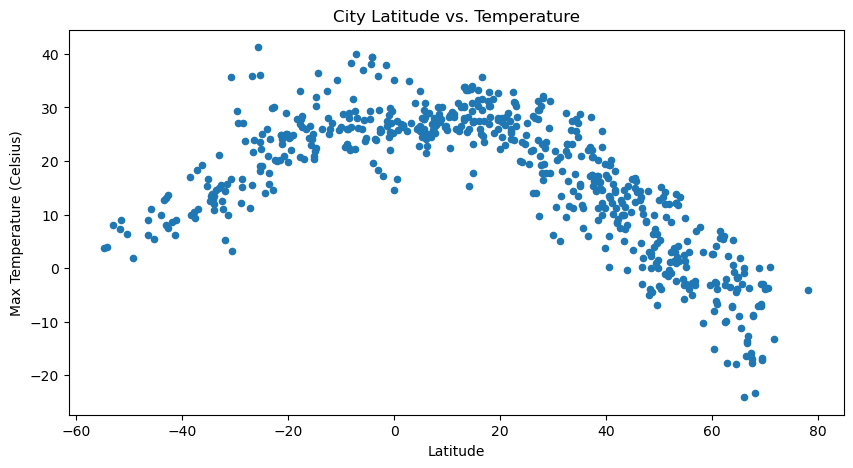

In [24]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind = "scatter", x = 'Lat', y = 'Max Temp', figsize = (10,5), title = "City Latitude vs. Temperature", xlabel = "Latitude", ylabel = "Max Temperature (Celsius)")

# Save the figure
plt.savefig("output_data/Fig1.png")
#Show plot
plt.show()

#### Latitude Vs. Humidity

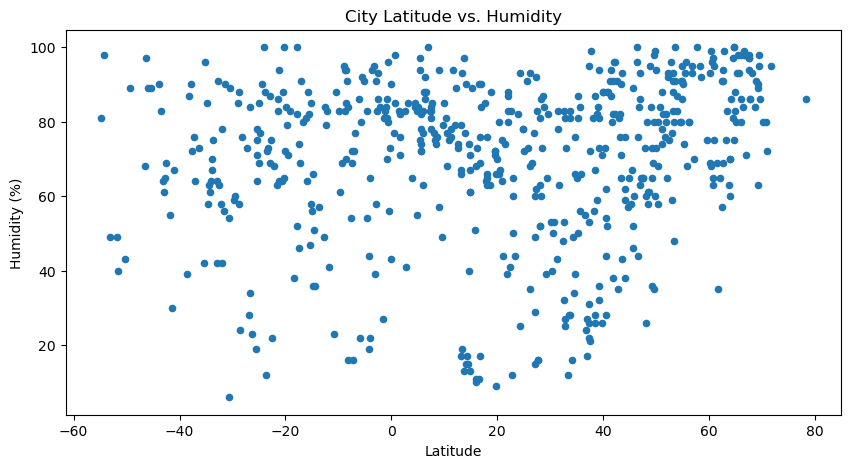

In [25]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind = "scatter", x = 'Lat', y = 'Humidity', figsize = (10,5), title = "City Latitude vs. Humidity", xlabel = "Latitude", ylabel = "Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")
#Show plot
plt.show()


#### Latitude Vs. Cloudiness

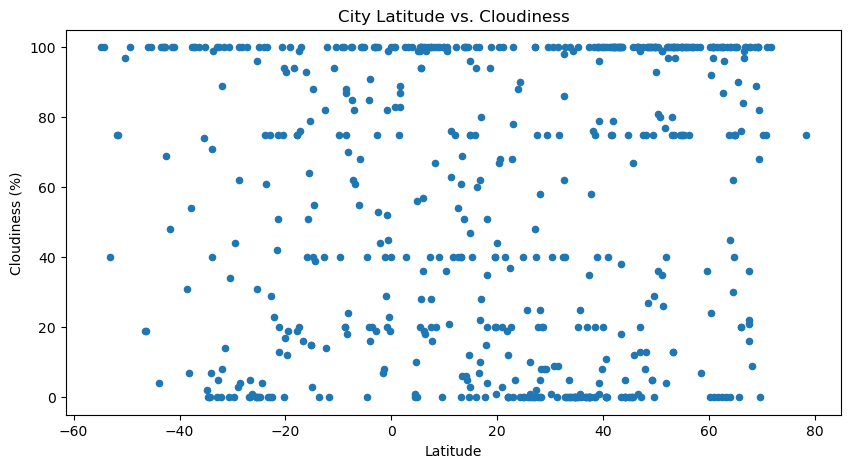

In [26]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind = "scatter", x = 'Lat', y = 'Cloudiness', figsize = (10,5), title = "City Latitude vs. Cloudiness", xlabel = "Latitude", ylabel = "Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")
#Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

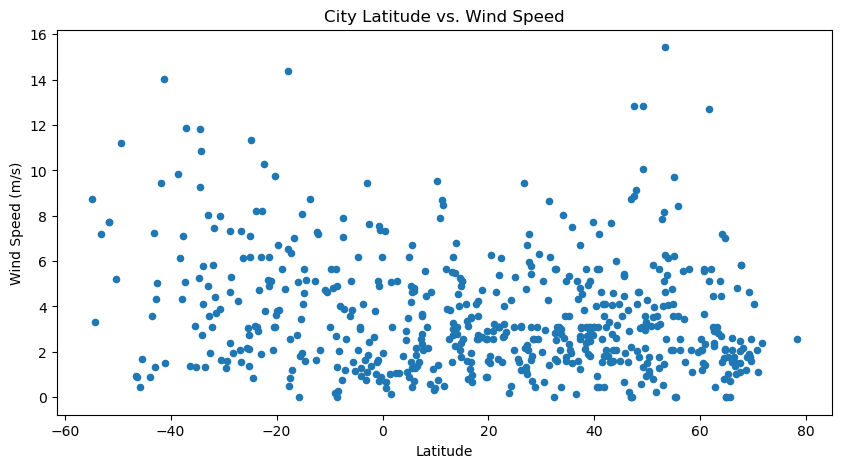

In [27]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind = "scatter", x = 'Lat', y = 'Wind Speed', figsize = (10,5), title = "City Latitude vs. Wind Speed", xlabel = "Latitude", ylabel = "Wind Speed (m/s)")


# Save the figure
plt.savefig("output_data/Fig4.png")
#Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,olonkinbyen,70.9221,-8.7187,0.22,72,100,1.10,SJ,1698604959
4,vadso,70.0744,29.7487,-3.91,80,75,4.12,NO,1698604960
6,harstad,68.7990,16.5293,0.09,91,89,1.79,NO,1698604961
9,porto novo,6.4965,2.6036,28.90,88,99,1.39,BJ,1698604961
11,cabo san lucas,22.8909,-109.9124,30.90,60,0,4.02,MX,1698604828


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,11.11,64,100,11.89,SH,1698604959
1,port mathurin,-19.6833,63.4167,24.57,79,12,6.72,MU,1698604959
3,port alfred,-33.5906,26.8910,14.54,75,99,1.34,ZA,1698604960
5,uturoa,-16.7333,-151.4333,26.02,80,16,7.03,PF,1698604960
7,hermanus,-34.4187,19.2345,13.88,63,0,11.84,ZA,1698604961


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7761138716444986


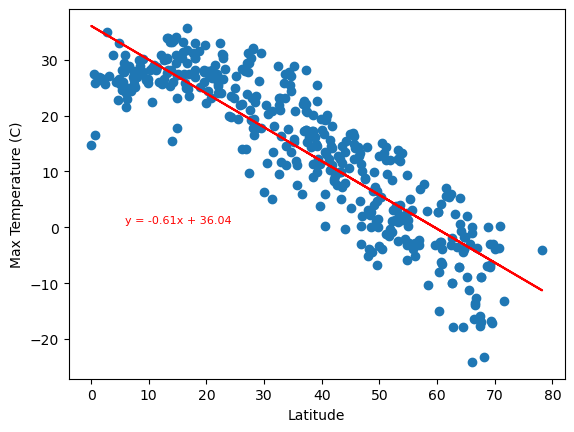

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=8,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.5741814813178296


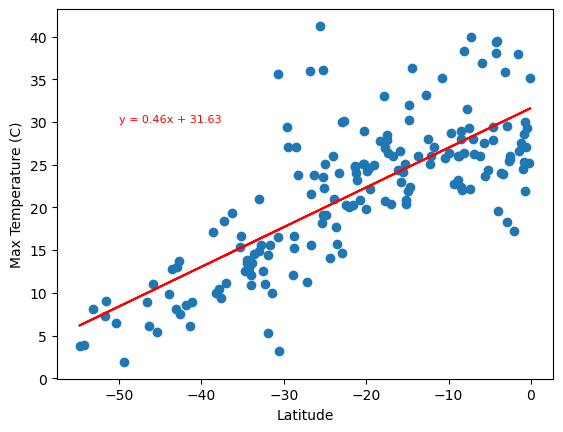

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=8,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** The above 2 plots demonstrate the linear relationship between latitude and max temperature in the northern and southern hemisphere with a linear regression analysis. In the northern hemisphere, latitude and temperature are strongly correlated, with a Pearson's correlation coefficient of 0.77. In the southern hemisphere, latitude and temperature and moderately correlated, with a Pearson's correlation coefficient of 0.57. This indicates that as one gets closer to the equator (closer to halfway between the north pole and the south pole), the temperature will increase.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.04727520645351413


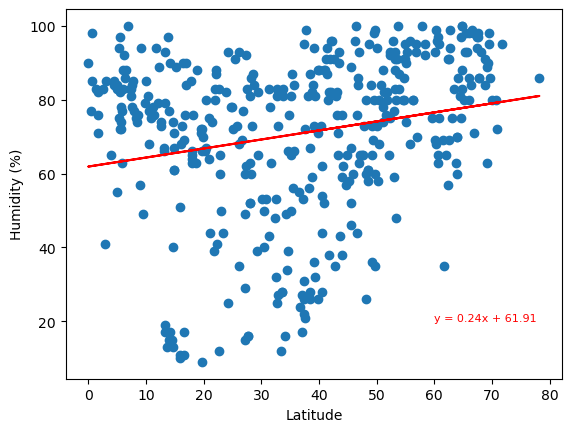

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60,20),fontsize=8,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.0015543482120561837


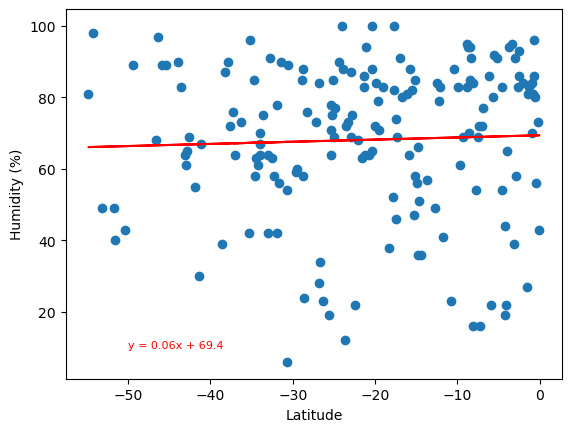

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=8,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** The above 2 plots demonstrate the linear relationship between latitude and % humidity in the northern and southern hemisphere with a linear regression analysis. In the northern hemisphere, latitude and % humidity are not correlated, with a Pearson's correlation coefficient of 0.05. In the southern hemisphere, latitude and % humidity and also not correlated, with a Pearson's correlation coefficient of 0.00. This indicates that there is no strong relationship between humidity and latitude; as one goes closer or further away from the equator, % humidity will not trend in any particular direction. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.02569908525286521


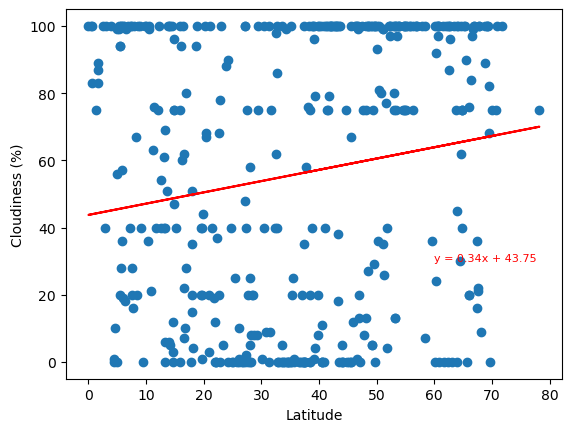

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60,30),fontsize=8,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.003147734387028848


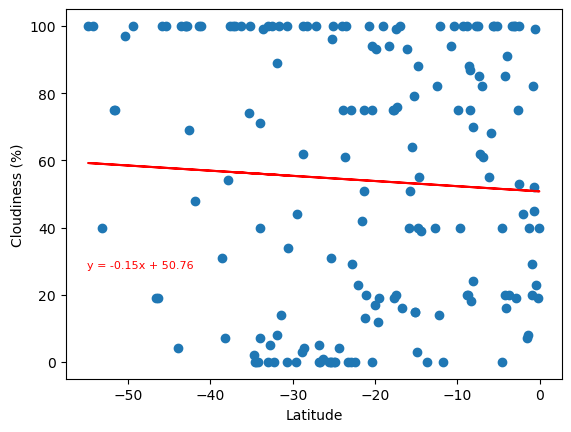

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,28),fontsize=8,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** The above 2 plots demonstrate the linear relationship between latitude and % cloudiness in the northern and southern hemisphere with a linear regression analysis. In the northern hemisphere, latitude and % cloudiness are not correlated, with a Pearson's correlation coefficient of 0.03. In the southern hemisphere, latitude and % cloudiness are also not correlated, with a Pearson's correlation coefficient of 0.00. This indicates that there is no strong relationship between % cloudiness and latitude; as one goes closer or further away from the equator, % cloudiness will not trend in any particular direction. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 9.717201546495729e-05


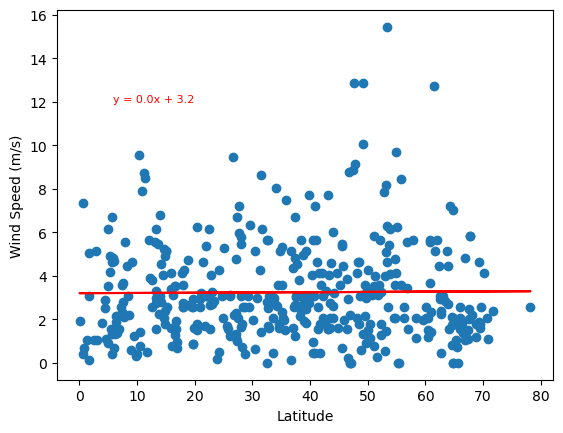

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,12),fontsize=8,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.055929575351743144


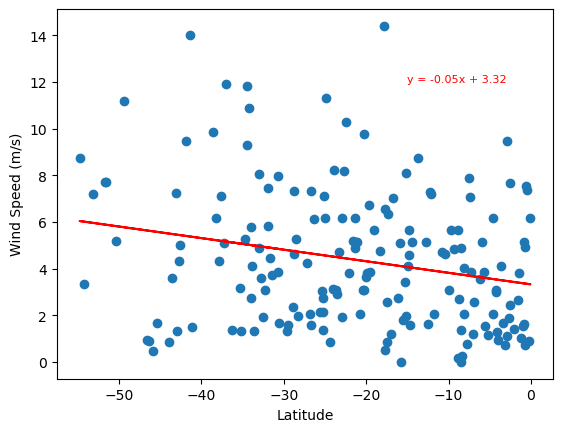

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-15,12),fontsize=8,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** The above 2 plots demonstrate the linear relationship between latitude and wind speed in the northern and southern hemisphere with a linear regression analysis. In the northern hemisphere, latitude and wind speed are not correlated, with a Pearson's correlation coefficient of 0.00. In the southern hemisphere, latitude and wind speed are also not correlated, with a Pearson's correlation coefficient of 0.06. This indicates that there is no strong relationship between wind speed and latitude; as one goes closer or further away from the equator, wind speed will not trend in any particular direction. 